# 7 reasons why I love Vaex for data science

In [1]:
import vaex

import numpy as np
import pylab as plt

import warnings
warnings.filterwarnings('ignore')

### Introduction

[Vaex](https://github.com/vaexio/vaex) is an open-source DataFrame library for Python with an API that closely resembles that of [Pandas](https://pandas.pydata.org/docs/index.html). I have been using Vaex for several years in both academic and industry environments, and it is my go-to library for several of the data science projects I am working on. In this article I would like to share some of my favourite Vaex features. Some may be obvious by now, but some may surprise you.

The following code examples are run on a MacBook Pro (15", 2018, 2.6GHz Intel Core i7, 32GB RAM). This article can 
also be [read as a Jupyter Notebook]().

### 1. Easy to work with very large datasets

Nowadays, it becomes increasingly more common to encounter datasets that are larger than the available RAM on a typical laptop or a desktop workstation. [Vaex](https://github.com/vaexio/vaex) solves this problem rather elegantly by the use of memory mapping and lazy evaluations. As long as your data is stored in a memory mappable file format such as Apache Arrow or HDF5, Vaex will open it instantly, no matter how large it is, or how much RAM your machine has. In fact, the size of the files Vaex can read are only limited by the amount of free hard-disk space you have. If your data is not in a memory-mappable file format (e.g. CSV, JSON), you can easily convert it by using the rich Pandas I/O in combination with Vaex. [See this guide](https://docs.vaex.io/en/latest/faq.html#I-have-a-massive-CSV-file-which-I-can-not-fit-all-into-memory-at-one-time.-How-do-I-convert-it-to-HDF5?) on how to do so.

In [2]:
# Check the file size on disk
!ls -l -h ../vaex-taxi/data/yellow_taxi_2009_2015_f32.hdf5

-rw-r--r--  1 jovan  staff   107G Jul  3  2019 ../vaex-taxi/data/yellow_taxi_2009_2015_f32.hdf5


In [3]:
# # Read data from S3
# df = vaex.open('s3://vaex/taxi/yellow_taxi_2009_2015_f32.hdf5?anon=true')

# Read data from local disk
df = vaex.open('../vaex-taxi/data/yellow_taxi_2009_2015_f32.hdf5')
df

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.630000114440918,-73.99195861816406,40.72156524658203,nan,nan,-73.99380493164062,40.6959228515625,8.899999618530273,0.5,nan,0.0,0.0,9.399999618530273
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.550000190734863,-73.98210144042969,40.736289978027344,nan,nan,-73.95584869384766,40.768028259277344,12.100000381469727,0.5,nan,2.0,0.0,14.600000381469727
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.350000381469727,-74.0025863647461,40.73974609375,nan,nan,-73.86997985839844,40.770225524902344,23.700000762939453,0.0,nan,4.739999771118164,0.0,28.440000534057617
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.9742660522461,40.79095458984375,nan,nan,-73.9965591430664,40.731849670410156,14.899999618530273,0.5,nan,3.049999952316284,0.0,18.450000762939453
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4000000059604645,-74.00157928466797,40.719383239746094,nan,nan,-74.00837707519531,40.7203483581543,3.700000047683716,0.0,nan,0.0,0.0,3.700000047683716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,173,057,922",VTS,2015-12-31 23:59:56.000000000,2016-01-01 00:08:18.000000000,5,1,1.2000000476837158,-73.99381256103516,40.72087097167969,1.0,0.0,-73.98621368408203,40.722469329833984,7.5,0.5,0.5,1.7599999904632568,0.0,10.5600004196167
"1,173,057,923",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527099609375,40.76028060913086,1.0,0.0,-73.93951416015625,40.75238800048828,7.5,0.5,0.5,0.0,0.0,8.800000190734863
"1,173,057,924",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.799999952316284,-73.98729705810547,40.739078521728516,1.0,0.0,-73.9886703491211,40.69329833984375,13.5,0.5,0.5,0.0,0.0,14.800000190734863
"1,173,057,925",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.9600000381469727,-73.99755859375,40.72569274902344,1.0,0.0,-74.01712036132812,40.705322265625,8.5,0.5,0.5,0.0,0.0,9.800000190734863


Caption: Opening and previewing a 100GB file with Vaex is instant.

### 2. No memory copies

Vaex has a zero memory copy policy. This means that filtering a DataFrames costs very little memory and does not copy the data. Consider the following example.

In [5]:
df_filtered = df[(df.passenger_count>0) & (df.passenger_count<5)]
df_filtered

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.630000114440918,-73.99195861816406,40.72156524658203,nan,nan,-73.99380493164062,40.6959228515625,8.899999618530273,0.5,nan,0.0,0.0,9.399999618530273
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.550000190734863,-73.98210144042969,40.736289978027344,nan,nan,-73.95584869384766,40.768028259277344,12.100000381469727,0.5,nan,2.0,0.0,14.600000381469727
2,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5.0,-73.9742660522461,40.79095458984375,nan,nan,-73.9965591430664,40.731849670410156,14.899999618530273,0.5,nan,3.049999952316284,0.0,18.450000762939453
3,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4000000059604645,-74.00157928466797,40.719383239746094,nan,nan,-74.00837707519531,40.7203483581543,3.700000047683716,0.0,nan,0.0,0.0,3.700000047683716
4,DDS,2009-01-16 22:35:59.000000000,2009-01-16 22:43:35.000000000,2,CASH,1.2000000476837158,-73.98980712890625,40.73500442504883,nan,nan,-73.98502349853516,40.72449493408203,6.099999904632568,0.5,nan,0.0,0.0,6.599999904632568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,061,605,165",CMT,2015-12-31 23:59:56.000000000,2016-01-01 00:09:25.000000000,1,1,1.0,-73.9738998413086,40.74289321899414,1.0,0.0,-73.98957061767578,40.75054931640625,8.0,0.5,0.5,1.850000023841858,0.0,11.149999618530273
"1,061,605,166",CMT,2015-12-31 23:59:58.000000000,2016-01-01 00:05:19.000000000,2,2,2.0,-73.96527099609375,40.76028060913086,1.0,0.0,-73.93951416015625,40.75238800048828,7.5,0.5,0.5,0.0,0.0,8.800000190734863
"1,061,605,167",CMT,2015-12-31 23:59:59.000000000,2016-01-01 00:12:55.000000000,2,2,3.799999952316284,-73.98729705810547,40.739078521728516,1.0,0.0,-73.9886703491211,40.69329833984375,13.5,0.5,0.5,0.0,0.0,14.800000190734863
"1,061,605,168",VTS,2015-12-31 23:59:59.000000000,2016-01-01 00:10:26.000000000,1,2,1.9600000381469727,-73.99755859375,40.72569274902344,1.0,0.0,-74.01712036132812,40.705322265625,8.5,0.5,0.5,0.0,0.0,9.800000190734863


Caption: Filtering a Vaex DataFrame does not copy the data and takes negligible amount of memory.

The creation of the `df_filtered` DataFrame takes no extra memory! This is because `df_filtered` is a _shallow_ copy of `df`. When creating filtered DataFrames, Vaex creates a binary mask which is then applied to the original data, without the need to make copies. The memory costs for these kind of filters are low: one needs ~1.2 GB of RAM to filter a 1 billion row DataFrame. This is negligible compared to other "classical" tools where one would need 100GB to simply read in the data, and another ~100GB for the filtered DataFrame.

### 3. Virtual columns

Transforming existing columns of a Vaex DataFrame into new ones results in the creation of _virtual columns_. Virtual columns behave just like normal ones, but they take up no memory what so ever. This is because Vaex only remembers the _expression_ the defines them, and does not calculate the values up front. These columns are lazily evaluated only when necessary, keeping memory usage low.

In [6]:
df['tip_percentage'] = df.tip_amount / df.total_amount * 100
df[['fare_amount', 'total_amount', 'tip_amount', 'tip_percentage']].head(5)

#,fare_amount,total_amount,tip_amount,tip_percentage
0,8.9,9.4,0,0
1,12.1,14.6,2,13.6986
2,23.7,28.44,4.74,16.6667
3,14.9,18.45,3.05,16.5312
4,3.7,3.7,0,0


Caption: The "tip_percentage" column is a virtual column: it take no extra memory and is lazily  evaluated on the fly when needed.

### 4. Performance

Vaex is _fast_. I mean _seriously fast_. The evaluation of virtual columns is fully parallelized and done with one pass over the data. Column methods such as "value_counts", "groupby" , "unique" and the various string operations are  using fast and efficient algoithms, implemented in C++ under the hood. All of them work in an out-of-core fashion, meaning you can process much more data than you fit into RAM, and use all available cores of your processor. For example, doing a "value_counts" operation takes only a second for over 1 billion rows!

In [9]:
df.passenger_count.value_counts(progress='widget')

1     812321234
2     172864560
5      81923912
3      51435890
6      25614703
        ...    
69            1
66            1
61            1
53            1
70            1
Length: 62, dtype: int64

Caption: Using Vaex, the "value_counts" operation takes ~1s for over _1.1 billion rows!_

### 5. Just-In-Time Compilation

### 2. No memory copies

Vaex has a zero memory copy policy. This means that filtering DataFrame costs very little memory and does not copy the data. Consider the following example.

As long as a virtual column is defined only using [Numpy](https://numpy.org/) or pure Python operations, Vaex can accelerate its evaluation by jitting, or Just-In-Time compilation via [Numba](http://numba.pydata.org/) or [Pythran](https://pythran.readthedocs.io/en/latest/). Vaex also supports acceleration via [CUDA](https://developer.nvidia.com/cuda-zone) if your machine has a CUDA enabled NVIDIA graphics card. This can be quite useful for speeding up the evaluation of rather computationally expensive virtual columns. 

Consider the example below. I have defined the arc distance between two geographical locations, a calculation that involves quite some algebra and trigonometry. Calculating the mean value will force the execution of this rather computationally expensive virtual column. When the execution is done purely with Numpy, it takes only 30 seconds, which I find impressive given that it is done for over **1.1 billion rows**. Now, when we do the same with the numba pre-compiled expression, we get ~2.5 times faster execution time, at least on my laptop. Unfortunately, I do not have an NVIDIA graphics card so I can not do the same using CUDA at this time. If you do, I'll be very happy if you could try this out and share the results.

A small but important bonus: Notice how you do not need to call `.compute` or any such method - Vaex automatically knows when to be lazy and when execute a computation.

In [10]:
def arc_distance(theta_1, phi_1, theta_2, phi_2):
    temp = (np.sin((theta_2-theta_1)/2*np.pi/180)**2
           + np.cos(theta_1*np.pi/180)*np.cos(theta_2*np.pi/180) * np.sin((phi_2-phi_1)/2*np.pi/180)**2)
    distance = 2 * np.arctan2(np.sqrt(temp), np.sqrt(1-temp))
    return distance * 3958.8

# Expression to be evaluated with numpy as usual
df['arc_distance_numpy'] = arc_distance(df.pickup_longitude, 
                                        df.pickup_latitude, 
                                        df.dropoff_longitude, 
                                        df.dropoff_latitude)

# Expression to be pre-compiled with numba, and then executed
df['arc_distance_numba'] = arc_distance(df.pickup_longitude, 
                                        df.pickup_latitude, 
                                        df.dropoff_longitude, 
                                        df.dropoff_latitude).jit_numba()

# Expression to be pre-compiled with CUDA, and then executed on you GPU 
# provided you have a CUDA compatible NVIDIA GPU.
# df['arc_distance_cuda'] = arc_distance(df.pickup_longitude, 
#                                        df.pickup_latitude, 
#                                        df.dropoff_longitude, 
#                                        df.dropoff_latitude).jit_cuda()

# Calculate the mean 
mean_numpy = df.arc_distance_numpy.mean(progress='widget')
mean_numba = df.arc_distance_numba.mean(progress='widget')
print(f'Mean arc distance comuted with numpy: {mean_numpy:.5f}')
print(f'Mean arc distance comuted with numba: {mean_numba:.5f}')

Mean arc distance comuted with numpy: 12.70720
Mean arc distance comuted with numba: 12.70720


Caption: Jitting can lead to ~2.5 time faster execution times for a computationally expensive virtual column.

### 6. Selections

Vaex implements a concept called _selections_ which is used to, ah, select the data. This is useful when you want to explore the data by, for example, calculating statistics on different portions of it without making a new reference DataFrame each time. The true power of using selections is that we can calculate a statistic for multiple selections with just one pass over the data.

In [12]:
select_n_passengers_lt3 = df.passenger_count < 3
select_n_passengers_ge3 = df.passenger_count >= 3

df.fare_amount.mean(selection=[None, select_n_passengers_lt3, select_n_passengers_ge3], progress='widget')

array([11.21730816, 11.2078196 , 11.26832503])

Caption: You can calculate statistics for multiple selections with one pass over the data.

This can be be also useful for making various visualisations. For example, we can use the `.count` method to create a couple of histograms on different selections with just one pass over the data. Quite efficient!

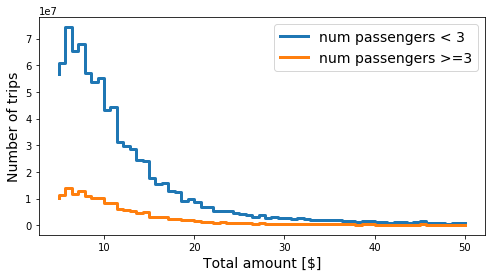

In [13]:
binned_dist_npass_lt3, binned_dist_npass_ge3 = df.count(binby=['total_amount'],
                                                        limits=[5, 50],
                                                        shape=64,
                                                        selection=[select_n_passengers_lt3, 
                                                                   select_n_passengers_ge3], 
                                                        progress='widget')

xvalues = np.linspace(5, 50, 64)
plt.figure(figsize=(8, 4))
plt.plot(xvalues, binned_dist_npass_lt3, drawstyle="steps-pre", label='num passengers < 3', lw=3)
plt.plot(xvalues, binned_dist_npass_ge3, drawstyle="steps-pre", label='num passengers >=3', lw=3)
plt.legend(fontsize=14)
plt.xlabel('Total amount [$]', fontsize=14)
plt.ylabel('Number of trips', fontsize=14)
plt.show()

Caption: One can create multiple histograms on different selections with just one pass over the data.

### 7. Groupby aggregations with selections

One of my favourite features of [Vaex](https://github.com/vaexio/vaex) is the ability to use selections inside aggregation functions. I often find myself wanting to do a group-by operation, in which the aggregations follow some additional rule or filter. The SQL-esque way of doing this would be to run several separate queries in which one would first filter the data and then do the group-by aggregation, and later join the outputs of those aggregations into one table. With Vaex, one can do this with a single operation, and with just one pass over the data! The following group-by example, ran on over 1.1 billion rows takes only 30 seconds to execute on my laptop!

In [15]:
df.groupby(by='vendor_id', agg={'count': vaex.agg.count(),
                                'count_fare_n_pass_lt3': vaex.agg.count(selection='passenger_count<3'),
                                'count_fare_n_pass_ge3': vaex.agg.count(selection='passenger_count>=3'),
                                'mean_fare_n_pass_lt3': vaex.agg.mean('fare_amount', selection='passenger_count<3'),
                                'mean_fare_n_pass_ge3': vaex.agg.mean('fare_amount', selection='passenger_count>=3'),
                               })

#,vendor_id,count,count_fare_n_pass_lt3,count_fare_n_pass_ge3,mean_fare_n_pass_lt3,mean_fare_n_pass_ge3
0,CMT,5.71882e+08,5.37345e+08,3.4537e+07,11.0698,11.917
1,DDS,1.41691e+07,1.30247e+07,1.14446e+06,10.3088,10.8373
2,VTS,5.87007e+08,4.38728e+08,1.48279e+08,11.4036,11.1206


Caption: Selections can be used inside groupby aggregation functions.

### Bonus: Progress bars

Looking at the examples above, you may have noticed many of the methods implemented in Vaex are accompanied by a progress bar. I absolutely love this feature! Since I often use Vaex with larger datasets, knowing how long an operation is likely to take is very handy. Besides, it looks pretty and it makes me feel good as a user :).

### Conclusion

Vaex is a rather powerful DataFrame library, especially when it comes to larger datasets. It has a variety of useful methods for data manipulation and visualization. These are just my top 7 reasons why I like working with this library. What are yours?